In [6]:
import os
import pandas as pd
import psycopg2
import matplotlib.pyplot as pyplot
%matplotlib inline

In [7]:
path = "data"
file_list = []
for files in os.listdir(path):
    file_list.append(files)
print(file_list)

['company_reports', 'database_tables', 'test']


In [8]:
df = pd.read_csv('data/company_reports/LSE_AAL_income_statement.csv',index_col='Period Ending',skiprows=1)

In [9]:
df.head()

,31/12/98,31/12/99,31/12/00,31/12/01,31/12/02,31/12/03,31/12/04,31/12/05,31/12/06,31/12/07,...,31/12/10,31/12/11,31/12/12,31/12/13,31/12/14,31/12/15,31/12/16,31/12/17,31/12/18,31/12/19
Period Ending,,,,,,,,,,,,,,,,,,,,,
Result Type,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,...,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS,Q4 IFRS
Turnover,11618.3,11578.0,14824.0,14786.0,15145.0,18637.0,26268.0,29434.0,24991.0,25470.0,...,27960.0,30580.0,28680.0,29342.0,27073.0,20455.0,21378.0,26243.0,27610.0,29870.0
Cost of sales,NaN,NaN,NaN,NaN,NaN,NaN,-22602,NaN,-14115,-14095,...,-15949,-17343,-25835,-22336,-18931,-15507,-12263,-14380,-15855,-16390
Gross profit,NaN,NaN,NaN,NaN,NaN,NaN,3666.0,NaN,10876.0,11375.0,...,12011.0,13237.0,2845.0,7006.0,8142.0,4948.0,9115.0,11863.0,11755.0,13480.0
Administrative expenses,-10469.4,-10508,-12341,-13921,-12629,-16960,-930,-23299.2,-2264,-2627,...,-2241,-3943,-4427,-4264,-3825,-3088,-5753,-6528,-6524,-7145


In [10]:
df2 = df.transpose()
df2

Period Ending,Result Type,Turnover,Cost of sales,Gross profit,Administrative expenses,Operating profit (standardised),Interest paid (net),Associates & joint ventures,Other income/expense,Pre-tax profit,...,Average shares (adjusted),Average shares (diluted),Research & development,Rental & lease expense,Stock based compensation,Capital expenditure,Number of employees,Tax rate %,Market capitalisation,Enterprise value
31/12/98,Q4 IFRS,11618.3,NaN,NaN,-10469.4,1148.9,-30.0,942.9,149.0,2375.9,...,1372.3,1383.2,45.0,81.0,NaN,-1586.9,63000.0,24.0,NaN,NaN
31/12/99,Q4 IFRS,11578.0,NaN,NaN,-10508,1070.0,26.0,1022.0,289.0,2817.0,...,1401.4,1419.6,34.0,55.0,NaN,-1296,NaN,17.1,24658.3,27817.5
31/12/00,Q4 IFRS,14824.0,NaN,NaN,-12341,2483.0,-103.0,1219.0,-77.0,3845.0,...,5703.9,5780.3,34.0,47.0,NaN,-1511,NaN,26.1,20436.1,26161.8
31/12/01,Q4 IFRS,14786.0,NaN,NaN,-13921,865.0,40.0,649.0,1361.0,5063.0,...,1341.3,1356.8,30.0,90.0,NaN,-1883,NaN,27.5,20237.3,24051.0
31/12/02,Q4 IFRS,15145.0,NaN,NaN,-12629,2516.0,-82.0,763.0,-125.0,3136.0,...,1284.0,1297.7,29.0,109.0,NaN,-2139,NaN,33.3,19868.8,25450.4
31/12/03,Q4 IFRS,18637.0,NaN,NaN,-16960,1677.0,-221.0,829.0,15.0,2673.0,...,1287.7,1345.0,39.0,129.0,NaN,-3025,NaN,27.5,28942.7,36230.5
31/12/04,Q4 IFRS,26268.0,-22602,3666.0,-930,2736.0,-1086.0,550.0,1649.0,4864.0,...,1304.9,1365.0,45.0,153.0,NaN,-3166,NaN,19.0,32138.9,39452.1
31/12/05,Q4 IFRS,29434.0,NaN,NaN,-23299.2,6134.8,-406.0,657.0,-542.8,5208.0,...,1316.8,1376.8,40.0,190.0,NaN,-3361,NaN,24.5,46353.4,52287.2
31/12/06,Q4 IFRS,24991.0,-14115,10876.0,-2264,8612.0,-108.0,459.0,-97.0,8443.0,...,1335.9,1368.6,37.0,147.0,NaN,-2910,NaN,29.8,66434.0,69943.4
31/12/07,Q4 IFRS,25470.0,-14095,11375.0,-2627,8748.0,-197.0,640.0,223.0,8821.0,...,1309.0,1327.0,41.0,183.0,NaN,-3931,NaN,30.5,80873.0,84640.9


In [11]:
if 'Result Type' in df2.columns:
    del df2['Result Type']
if ' ' in df2.columns:
    del df2[' ']
df2.index = pd.to_datetime(df2.index)
df2 = df2.astype(float)

In [12]:
df2.head()

Period Ending,Turnover,Cost of sales,Gross profit,Administrative expenses,Operating profit (standardised),Interest paid (net),Associates & joint ventures,Other income/expense,Pre-tax profit,Taxation,...,Average shares (adjusted),Average shares (diluted),Research & development,Rental & lease expense,Stock based compensation,Capital expenditure,Number of employees,Tax rate %,Market capitalisation,Enterprise value
1998-12-31,11618.3,NaN,NaN,-10469.4,1148.9,-30.0,942.9,149.0,2375.9,-570.0,...,1372.3,1383.2,45.0,81.0,NaN,-1586.9,63000.0,24.0,NaN,NaN
1999-12-31,11578.0,NaN,NaN,-10508.0,1070.0,26.0,1022.0,289.0,2817.0,-481.0,...,1401.4,1419.6,34.0,55.0,NaN,-1296.0,NaN,17.1,24658.3,27817.5
2000-12-31,14824.0,NaN,NaN,-12341.0,2483.0,-103.0,1219.0,-77.0,3845.0,-1005.0,...,5703.9,5780.3,34.0,47.0,NaN,-1511.0,NaN,26.1,20436.1,26161.8
2001-12-31,14786.0,NaN,NaN,-13921.0,865.0,40.0,649.0,1361.0,5063.0,-1394.0,...,1341.3,1356.8,30.0,90.0,NaN,-1883.0,NaN,27.5,20237.3,24051.0
2002-12-31,15145.0,NaN,NaN,-12629.0,2516.0,-82.0,763.0,-125.0,3136.0,-1045.0,...,1284.0,1297.7,29.0,109.0,NaN,-2139.0,NaN,33.3,19868.8,25450.4


In [13]:
for col in df2.columns: 
    print(col)

Turnover
Cost of sales
Gross profit
Administrative expenses
Operating profit (standardised)
Interest paid (net)
Associates & joint ventures
Other income/expense
Pre-tax profit
Taxation
Post-tax profit
Minorities
Extraordinary items
Discontinued operations
Profit for financial year
EBITDA
Depreciation & amortisation
EBIT
Interest expense
Pre-tax profit
Discontinued post-tax profit
Dividend (announced) ps
Dividend (adjusted) ps
EPS rep. continuous
EPS rep. discontinued
EPS reported
EPS norm. continuous
Pre-tax profit
Post-tax profit
EBIT
EBITDA
Operating profit
Post-tax profit
EBIT
EBITDA
EPS (basic)
EPS (diluted)
Number of shares
Average shares (adjusted)
Average shares (diluted)
Research & development
Rental & lease expense
Stock based compensation
Capital expenditure
Number of employees
Tax rate %
Market capitalisation
Enterprise value


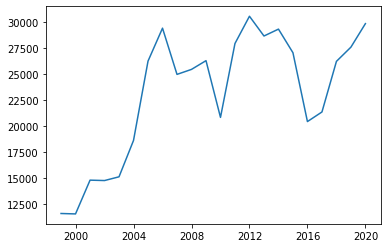

In [14]:
pyplot.plot(df2.index,df2['Turnover'])

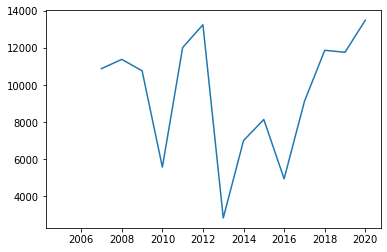

In [15]:
pyplot.plot(df2.index,df2['Gross profit'])

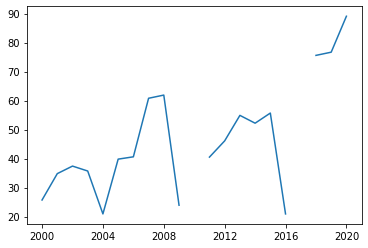

In [16]:
pyplot.plot(df2.index,df2['Dividend (adjusted) ps'])

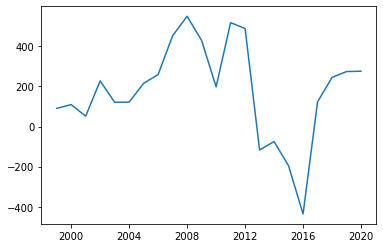

In [17]:
pyplot.plot(df2.index,df2['EPS reported'])

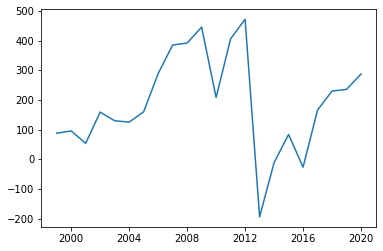

In [18]:
pyplot.plot(df2.index,df2['EPS norm. continuous'])